In [87]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan

In [88]:
with open("learned_embeddings_selectmin5_epoch5_batch128_w2v_ns.npy", 'rb') as f:
    learned_embeddings = np.load(f)


In [89]:
with open("word_to_index_interview_ds_selectmin5.npy", 'rb') as f:
    word_to_index_array = np.load(f)


In [90]:
learned_embeddings

array([[ -5.6703825 ,  -0.4717555 ,   4.34598   , ..., -10.79912   ,
          6.139454  ,   5.7288117 ],
       [ -6.5502954 ,  -6.0404596 ,   6.494114  , ...,  -0.02863985,
         -4.0164757 ,   1.1182547 ],
       [-11.4058485 ,   6.5230584 ,  -1.2585332 , ...,   3.7255511 ,
         -1.0367857 ,   4.2671685 ],
       ...,
       [ -5.2103806 ,  -7.364882  ,   3.7103713 , ...,  -9.234186  ,
          4.180662  ,   4.2845635 ],
       [ -4.1521173 ,  -3.5182796 ,   4.7192554 , ...,  -4.3458467 ,
         -3.8782043 ,   3.4916503 ],
       [ -7.3217015 ,  -3.8869166 ,   4.599301  , ...,  -6.523805  ,
          4.7199273 ,   5.602192  ]], dtype=float32)

In [91]:
word_to_index = {i[0]: int(i[1]) for i in word_to_index_array}

In [92]:
# word_to_index

In [93]:
learned_embeddings_df = pd.DataFrame(learned_embeddings, columns=list(range(learned_embeddings.shape[1])))
learned_embeddings_df.index = [word for idx, word in enumerate(word_to_index)]

In [94]:
learned_embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
belts,-5.670382,-0.471756,4.345980,-4.160932,0.818434,5.111917,-7.749717,-7.070394,-6.383231,5.249421,...,5.691898,-4.991246,6.644459,-3.263346,-5.952358,9.942032,6.213098,-10.799120,6.139454,5.728812
tiny,-6.550295,-6.040460,6.494114,-2.769753,-5.179942,5.107744,0.083338,-2.209901,-0.819203,6.034648,...,2.676346,-2.427824,7.639583,-5.716515,-0.007010,3.415346,2.950482,-0.028640,-4.016476,1.118255
best,-11.405849,6.523058,-1.258533,-10.758827,3.465968,-11.886815,-9.219481,-3.517077,4.248380,10.244158,...,-8.047127,-9.383051,-5.488760,6.580856,3.557805,2.340497,-2.847190,3.725551,-1.036786,4.267169
howled,-5.973531,-4.634255,5.849425,-5.128658,-0.547929,7.004808,-8.489743,-6.244305,-9.350308,4.764125,...,5.890907,-7.986130,3.586059,-7.019848,-8.387007,6.507574,7.163144,-7.727669,6.520991,12.372614
frogonce,-6.450995,-5.149568,4.754726,-4.096526,-0.423258,5.870553,-9.414701,-8.760723,-8.296364,7.808949,...,8.574433,-3.032536,6.353772,-1.865198,-8.300516,5.579659,6.226706,-6.102859,5.771795,7.748759


In [95]:
# ?TSNE

In [96]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 42, perplexity=100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(learned_embeddings_df)

In [97]:
tsne_df

array([[-11.340697 , -15.842047 ],
       [  2.2669475,  25.474571 ],
       [ -0.489635 ,  31.269537 ],
       ...,
       [  4.4068975,  -6.1806006],
       [ -5.7929   ,   4.401343 ],
       [  3.0496793,  -7.244358 ]], dtype=float32)

In [98]:
tsne.kl_divergence_, tsne.get_params()

(1.7097519636154175,
 {'angle': 0.5,
  'early_exaggeration': 12.0,
  'init': 'random',
  'learning_rate': 200.0,
  'method': 'barnes_hut',
  'metric': 'euclidean',
  'min_grad_norm': 1e-07,
  'n_components': 2,
  'n_iter': 1000,
  'n_iter_without_progress': 300,
  'n_jobs': None,
  'perplexity': 100,
  'random_state': 42,
  'verbose': 0})

In [99]:
# ?tsne

In [100]:
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [101]:
for ii in range(2,11):

    kmeans = KMeans(n_clusters=ii, max_iter=1000, tol=0.00001, random_state=42)
    # agglom = AgglomerativeClustering(n_clusters=ii, affinity="euclidean", linkage="ward")

    clusters = kmeans.fit(tsne_df)
    # clusters = agglom.fit(tsne_df)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(tsne_df, clusters.labels_)

    print(ii," : ", silhouette_avg)

2  :  0.4711285
3  :  0.57791203
4  :  0.58371264
5  :  0.6261099
6  :  0.60605735
7  :  0.53799653
8  :  0.52609515
9  :  0.5093891
10  :  0.49133217


In [85]:
# # Create an HDBSCAN clusterer
# clusterer = hdbscan.HDBSCAN(min_cluster_size=50, gen_min_span_tree=True)

# # Fit the clusterer to the data
# clusterer.fit(tsne_df)

# # Plot the results
# labels = clusterer.labels_

# silhouette_avg = np.round(silhouette_score(tsne_df, labels),2)
# silhouette_avg

In [105]:
# Create a Gaussian Mixture Model with 4 clusters
n_components = 5
gmm = GaussianMixture(n_components=n_components, random_state=42)

# Fit the GMM to the data
gmm.fit(tsne_df)

# Predict cluster assignments for each data point
gmm_labels = gmm.predict(tsne_df)

# Get the means and covariances of the clusters
gmm_cluster_means = gmm.means_
gmm_cluster_covariances = gmm.covariances_

silhouette_avg = np.round(silhouette_score(tsne_df, gmm_labels),2)
silhouette_avg

0.63

In [106]:
# kmeans = KMeans(n_clusters=5, max_iter=500, tol=0.0001, random_state=42)
# clusters_km = kmeans.fit(tsne_df)

# # Calculate the silhouette score
# silhouette_avg = silhouette_score(tsne_df, clusters_km.labels_)


# print(silhouette_avg)

In [107]:
# agglom = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
# clusters_agg = agglom.fit(tsne_df)

# # Calculate the silhouette score
# silhouette_avg = silhouette_score(tsne_df, clusters_agg.labels_)


# print(silhouette_avg)

In [108]:
# # Get the cluster centers
# cluster_centers_km = kmeans.cluster_centers_

# # Plot the t-SNE data with cluster labels and boundaries
# plt.figure(figsize=(20, 16))

# # Plot data points with cluster labels
# for i, label in enumerate(np.unique(clusters_km.labels_)):
#     indices = np.where(clusters_km.labels_ == label)
#     plt.scatter(tsne_df[indices, 0], tsne_df[indices, 1], label=f'Cluster {label}')

# # Plot cluster boundaries
# for center in cluster_centers_km:
#     plt.gca().add_patch(plt.Circle(center, 0.05, color='black', fill=True,))

# # Set plot title and legend
# plt.title('t-SNE Plot with Cluster Labels')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.legend(loc='best')

# # Show the plot
# plt.show()

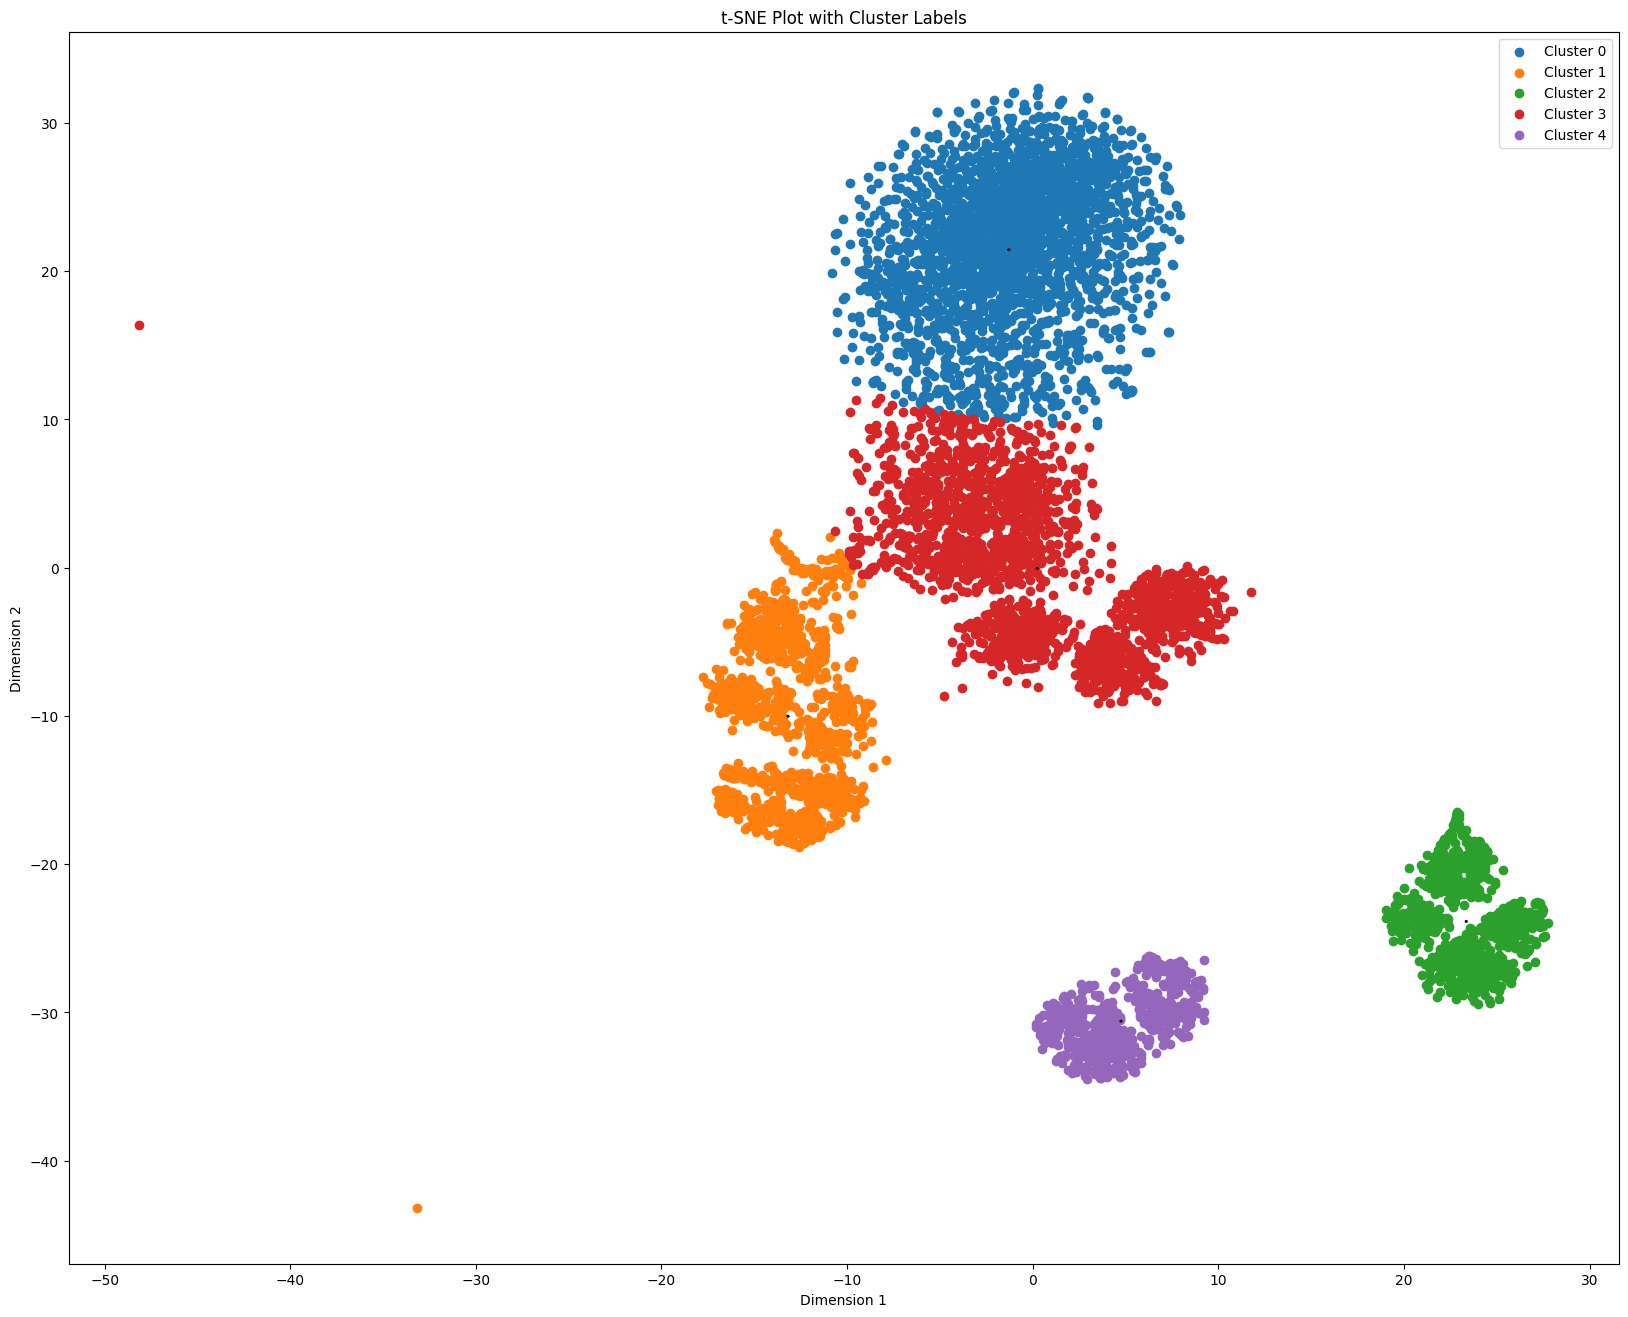

In [109]:
# Get the cluster centers
cluster_centers = gmm_cluster_means

# Plot the t-SNE data with cluster labels and boundaries
plt.figure(figsize=(20, 16))

# Plot data points with cluster labels
for i, label in enumerate(np.unique(gmm_labels)):
    indices = np.where(gmm_labels == label)
    plt.scatter(tsne_df[indices, 0], tsne_df[indices, 1], label=f'Cluster {label}')

# Plot cluster boundaries
for center in cluster_centers:
    plt.gca().add_patch(plt.Circle(center, 0.05, color='black', fill=True,))

# Set plot title and legend
plt.title('t-SNE Plot with Cluster Labels')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')

# Show the plot
plt.show()

In [110]:
# # Plot the t-SNE data with cluster labels and boundaries
# plt.figure(figsize=(20, 16))

# # Plot data points with cluster labels
# for i, label in enumerate(np.unique(clusters_agg.labels_)):
#     indices = np.where(clusters_agg.labels_ == label)
#     plt.scatter(tsne_df[indices, 0], tsne_df[indices, 1], label=f'Cluster {label}')

# # Set plot title and legend
# plt.title('t-SNE Plot with Cluster Labels')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.legend(loc='best')

# # Show the plot
# plt.show()

In [111]:
learned_embeddings_df["cluster_id"] = gmm_labels

In [112]:
set(gmm_labels)

{0, 1, 2, 3, 4}

In [113]:
learned_embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,cluster_id
belts,-5.670382,-0.471756,4.345980,-4.160932,0.818434,5.111917,-7.749717,-7.070394,-6.383231,5.249421,...,-4.991246,6.644459,-3.263346,-5.952358,9.942032,6.213098,-10.799120,6.139454,5.728812,1
tiny,-6.550295,-6.040460,6.494114,-2.769753,-5.179942,5.107744,0.083338,-2.209901,-0.819203,6.034648,...,-2.427824,7.639583,-5.716515,-0.007010,3.415346,2.950482,-0.028640,-4.016476,1.118255,0
best,-11.405849,6.523058,-1.258533,-10.758827,3.465968,-11.886815,-9.219481,-3.517077,4.248380,10.244158,...,-9.383051,-5.488760,6.580856,3.557805,2.340497,-2.847190,3.725551,-1.036786,4.267169,0
howled,-5.973531,-4.634255,5.849425,-5.128658,-0.547929,7.004808,-8.489743,-6.244305,-9.350308,4.764125,...,-7.986130,3.586059,-7.019848,-8.387007,6.507574,7.163144,-7.727669,6.520991,12.372614,4
frogonce,-6.450995,-5.149568,4.754726,-4.096526,-0.423258,5.870553,-9.414701,-8.760723,-8.296364,7.808949,...,-3.032536,6.353772,-1.865198,-8.300516,5.579659,6.226706,-6.102859,5.771795,7.748759,1


In [114]:
tsne_df1 = pd.DataFrame(tsne_df, columns=["x1","x2"])
tsne_df1["cluster_id"] = gmm_labels

In [115]:
from sklearn.metrics import silhouette_samples

In [116]:
learned_embeddings_df["silhouette_samples"] = silhouette_samples(tsne_df1[["x1","x2"]], tsne_df1["cluster_id"])

In [117]:
learned_embeddings_df2 = learned_embeddings_df.copy()

In [118]:
learned_embeddings_df2 = learned_embeddings_df2.sort_values(by=["cluster_id","silhouette_samples"], ascending=[True, False]).reset_index()

In [119]:
learned_embeddings_df2.groupby(["cluster_id"]).agg(cnt=("cluster_id","count"))

,cnt
cluster_id,
0,2366
1,1289
2,864
3,1992
4,723


In [122]:
learned_embeddings_df2[learned_embeddings_df2["cluster_id"]==1].head(30)

,index,0,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,cluster_id,silhouette_samples
2366,birthdays,-3.810650,-5.004862,4.950244,-6.798758,-1.060611,5.209884,-6.139199,-6.473955,-8.173669,...,4.804449,-2.816586,-6.832389,6.413894,8.074176,-8.324173,7.047369,5.903440,1,0.718911
2367,batch,-7.303518,-3.071512,3.563469,-4.803854,1.262818,4.415855,-8.132492,-6.815434,-6.654560,...,5.874935,-5.008940,-7.689441,6.761225,3.130384,-7.770775,6.190722,1.589306,1,0.718838
2368,risky,-6.459928,-1.305398,5.543026,-1.280228,1.420477,4.165394,-8.800035,-9.660890,-6.897938,...,5.044991,-7.184773,-6.342258,9.114258,7.921268,-6.214401,5.411717,7.403441,1,0.718678
2369,holds,-0.034907,-4.709233,6.248650,-2.055086,1.228574,4.946869,-3.997232,-7.491099,-5.671069,...,3.446480,-3.412515,-7.413553,5.668622,6.632869,-6.880949,5.704432,2.045800,1,0.718494
2370,dangers,-1.819944,-1.007914,4.424105,-4.564808,-0.485202,4.213616,-6.645497,-10.097682,-4.238964,...,6.193189,-3.253776,-2.997790,8.447755,4.413285,-6.311691,4.248465,5.946187,1,0.716743
2371,raked,-6.022763,-4.907957,6.472933,-5.669417,0.926982,3.349271,-8.990423,-9.052200,-5.537556,...,5.918280,-2.549690,-5.891245,6.757302,5.421093,-5.945880,4.978633,6.464312,1,0.716041
2372,outone,-5.317695,-6.207465,6.750028,-2.451917,2.524778,5.886522,-8.675752,-8.377121,-6.041374,...,5.838312,-4.686206,-9.152764,6.058114,5.561245,-11.408507,4.601823,5.097619,1,0.715770
2373,troubleone,-8.287342,-3.879390,3.749902,-3.100355,1.388744,5.503422,-9.682518,-9.262708,-5.209293,...,3.364330,-2.555652,-11.091978,5.485074,5.765867,-8.592744,4.475404,8.313450,1,0.715746
2374,napping,-3.067641,-3.550413,6.276065,-4.649789,0.916776,1.089541,-7.608952,-5.750521,-5.931265,...,3.823256,-4.018723,-7.837240,9.088034,5.955379,-6.507164,4.328444,4.621598,1,0.715695
2375,springtime,-6.222816,-4.876747,3.836007,-3.655358,-2.243398,4.049037,-10.478104,-8.646038,-8.680784,...,3.080784,-4.560693,-6.529268,5.912884,8.051717,-6.640904,3.429782,8.800648,1,0.715445


In [124]:
learned_embeddings_df2[(learned_embeddings_df2["index"].index>=2070) & (learned_embeddings_df2["index"].index<=2087)].head(30)

,index,0,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,cluster_id,silhouette_samples
2070,scream,-9.245084,-4.083937,7.850717,-4.057961,-1.298391,0.894460,0.478709,-0.267311,-3.344492,...,7.098162,-3.403577,-5.392164,3.020972,4.946814,-2.971719,-3.899463,-2.242785,0,0.464451
2071,ink,-4.494650,-3.186970,2.553199,-12.497490,-4.585898,2.505250,0.109543,-1.358369,2.371870,...,7.932470,-1.604350,-0.183043,3.797401,3.241125,-0.848654,-4.874505,-4.990067,0,0.463855
2072,tuna,-2.105767,-5.234195,5.365340,-8.716697,-2.698232,6.863762,2.460455,-0.204056,-0.070241,...,5.003195,-5.996021,-0.531562,2.092304,7.434456,-5.657615,-4.403619,0.734248,0,0.463701
2073,leather,-3.964618,-5.657480,7.200518,-6.959065,-0.162917,-0.102725,-5.084746,-1.545816,-3.302434,...,3.834596,-7.745407,-3.463080,6.384002,12.391110,-8.146441,-1.958955,0.238487,0,0.463127
2074,dessert,-5.017889,-4.622643,4.769178,-5.315695,-1.441642,5.412122,-1.901636,-2.454303,0.998177,...,8.104966,-8.298679,-4.948324,6.457168,4.779004,-3.778298,-1.253936,3.764920,0,0.462262
2075,years,-5.477959,-2.230486,9.044179,-6.532796,4.323742,-3.213674,2.400381,4.213392,1.289465,...,3.556860,-10.364730,-6.058367,-1.231431,7.807339,-7.202090,-11.050277,-3.780298,0,0.460648
2076,told,5.274919,-5.043463,11.015350,-8.330484,9.571316,-1.587825,2.683318,0.121922,-3.700563,...,-0.173513,-4.563671,2.655117,-1.753100,8.075907,-6.522466,0.525086,2.330036,0,0.459804
2077,engine,-5.007531,-4.483574,2.680453,-10.052095,-2.707079,-0.516365,0.851458,0.800782,-2.326734,...,1.701132,-5.517023,-2.654066,3.495086,4.231178,-3.551990,-6.298533,-1.902772,0,0.459085
2078,airport,-9.950059,-5.502983,4.362983,-9.063853,-2.670349,1.038052,-2.971956,-2.826353,1.757179,...,6.198985,-4.339978,-3.941467,3.721663,7.546498,-1.596088,-5.989899,-3.104573,0,0.458760
2079,palm,-6.737926,-4.585347,6.612044,-3.762652,0.456551,1.045391,-0.423488,-3.996163,-4.032588,...,8.449710,-3.685060,-5.399548,5.105589,6.303350,-3.886318,0.221381,2.287661,0,0.458284
